# Introduction

About this Dataset https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

# Method

1.Data Collection
Data collection is the initial and crucial step in any data-driven project. It involves gathering raw information from various sources to gain insights, make informed decisions, and solve problems.

2.Descriptive Statistics 
Descriptive statistics is a branch of statistics that involves summarizing and describing the main features of a dataset. It provides a snapshot of the data, highlighting its central tendencies, variability, and distribution.

3.Web Scraping
Web scraping is an automated process of extracting data from websites. It involves using software to fetch, parse, and structure data from the web. This technique is widely used for various purposes.

4.Regression Analysis
Regression analysis is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It helps us understand how changes in the independent variables affect the dependent variable.

# Data display

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load datasets
data = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

In [3]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
data.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [5]:
data.count()

User ID                       700
Device Model                  700
Operating System              700
App Usage Time (min/day)      700
Screen On Time (hours/day)    700
Battery Drain (mAh/day)       700
Number of Apps Installed      700
Data Usage (MB/day)           700
Age                           700
Gender                        700
User Behavior Class           700
dtype: int64

# Descriptive Statistics 

In [6]:
data['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

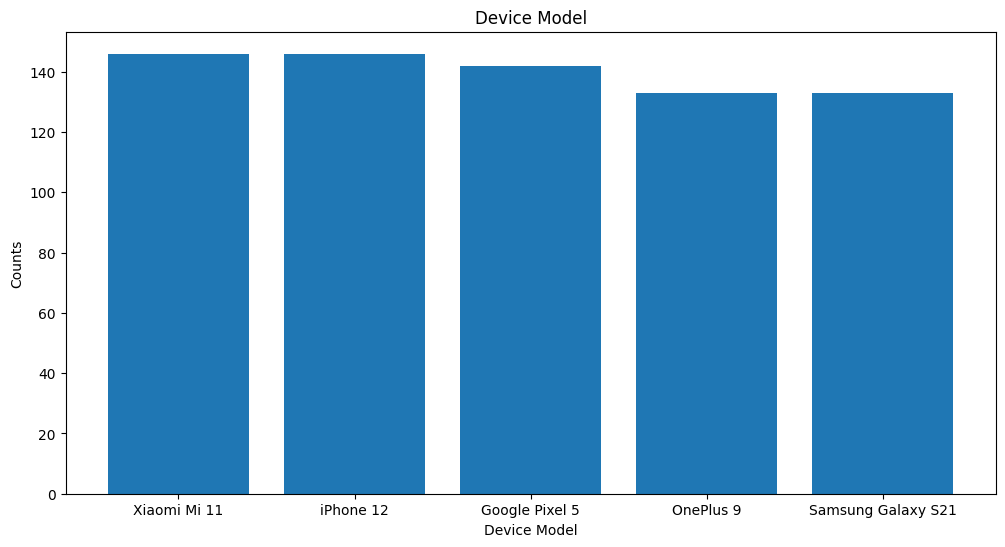

In [7]:
# Choose column to display
x = data['Device Model']
counts = x.value_counts()

# Plt bar
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values)

# Set title
plt.title('Device Model')
plt.xlabel('Device Model')
plt.ylabel('Counts')

plt.show()

In [8]:
data['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

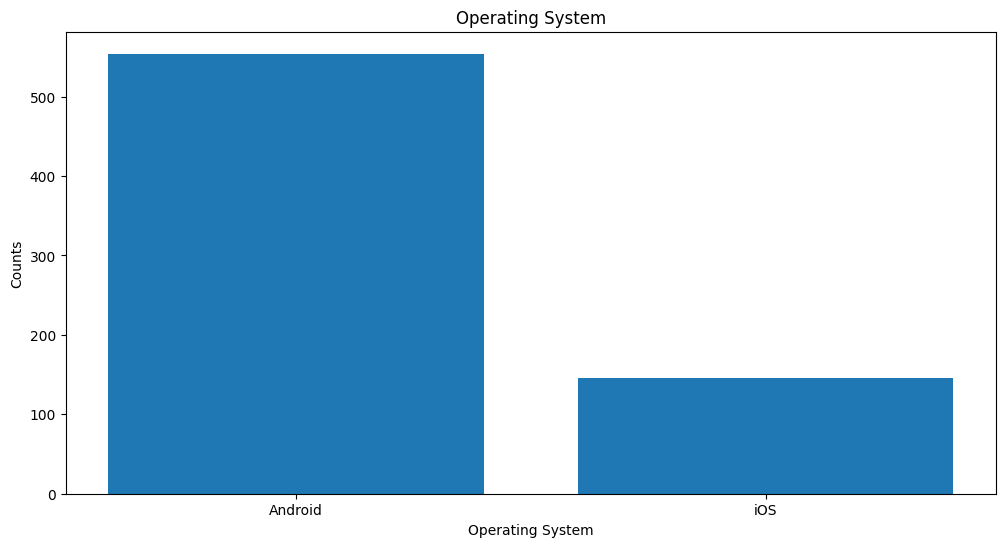

In [9]:
# Choose column to display
x = data['Operating System']
counts = x.value_counts()

# Plt bar
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values)

# Set title
plt.title('Operating System')
plt.xlabel('Operating System')
plt.ylabel('Counts')

plt.show()

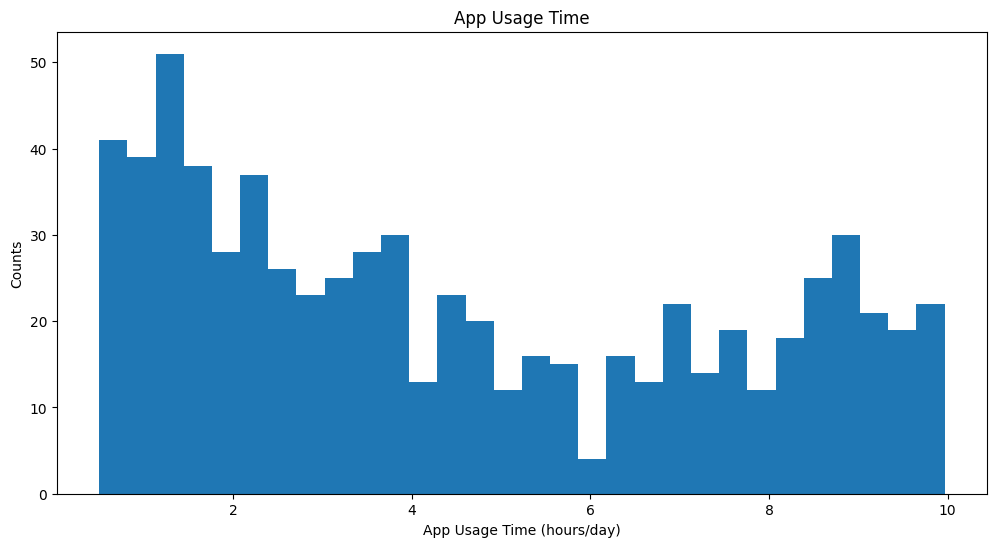

In [10]:
# Choose column to display
x = data['App Usage Time (min/day)']

# Plt bar
plt.figure(figsize=(12,6))
plt.hist(x/60, bins=30)

# Set title
plt.title('App Usage Time')
plt.xlabel('App Usage Time (hours/day)')
plt.ylabel('Counts')

plt.show()

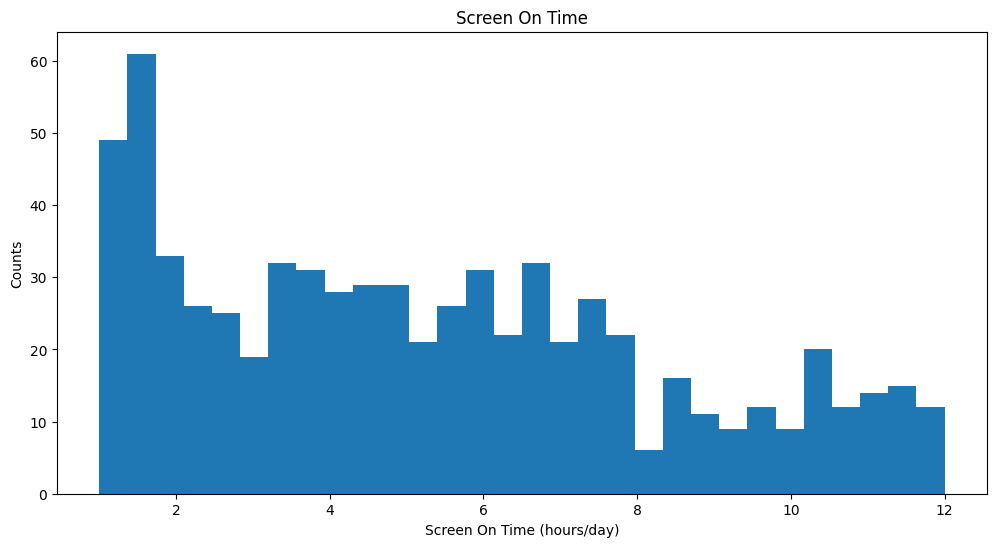

In [11]:
# Choose column to display
x = data['Screen On Time (hours/day)']

# Plt bar
plt.figure(figsize=(12,6))
plt.hist(x, bins=30)

# Set title
plt.title('Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Counts')

plt.show()

# Feature Engineering

In [12]:
# Devides and bins
bins = [0, 60, 240, 480, float('inf')]
labels = ['less than 120 mins', 'between 120-360 mins', 'between 360-600 mins', 'more than 600 mins']
x_feature = pd.cut(x, bins=bins, labels=labels)

print(x_feature)

0      less than 120 mins
1      less than 120 mins
2      less than 120 mins
3      less than 120 mins
4      less than 120 mins
              ...        
695    less than 120 mins
696    less than 120 mins
697    less than 120 mins
698    less than 120 mins
699    less than 120 mins
Name: Screen On Time (hours/day), Length: 700, dtype: category
Categories (4, object): ['less than 120 mins' < 'between 120-360 mins' < 'between 360-600 mins' < 'more than 600 mins']


In [13]:
counts = x_feature.value_counts()

print(counts)

Screen On Time (hours/day)
less than 120 mins      700
between 120-360 mins      0
between 360-600 mins      0
more than 600 mins        0
Name: count, dtype: int64


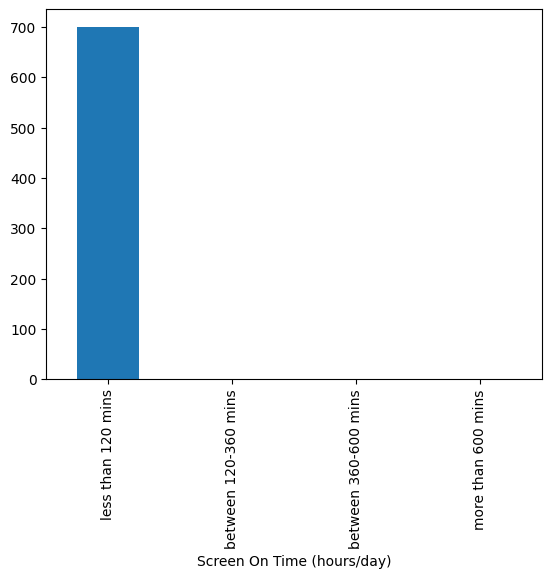

<Figure size 1200x600 with 0 Axes>

In [14]:
# 計算每個標籤出現的次數
counts = x_feature.value_counts()
counts = counts.reindex(['less than 120 mins', 'between 120-360 mins','between 360-600 mins' , 'more than 600 mins'])

# 繪製 bar chart
counts.plot(kind = 'bar')
plt.figure(figsize=(12,6))
plt.show()

# Web Scraping

# Regression Analysis